In [1]:
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.vec_env import DummyVecEnv
import gym
from MetaWorld.searchTest.utils import MyEnv, ToyExpertModel, sample_expert_transitions, benchmark_policy, LearnWrapper, train_policy, SuperMyGymWrapper, supermipWrapper, LearnWrapper
import torch
import zipfile
from stable_baselines3.common.vec_env import DummyVecEnv, SubprocVecEnv
import importlib
import numpy as np
from RlBaselines3Zoo import enjoy
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.ppo import MlpPolicy

from imitation.algorithms import bc
from imitation.data import rollout
from imitation.data.wrappers import RolloutInfoWrapper

from stable_baselines3.common.policies import MultiInputActorCriticPolicy
from stable_baselines3.common.torch_layers import (
    BaseFeaturesExtractor,
    CombinedExtractor,
    FlattenExtractor,
    NatureCNN,
    create_mlp,
    get_actor_critic_arch,
)
from sb3_contrib.tqc.tqc import TQC
from sb3_contrib.tqc.policies import MultiInputPolicy
import numpy as np
import torch as th

model = enjoy.main(inpt_args="--algo tqc --env FetchPickAndPlace-v1 --folder /home/hendrik/Documents/master_project/Code/RlBaselines3Zoo/rl-trained-agents -n 300 --ret_model True")

/home/hendrik/anaconda3/envs/tfTest/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-07-27 13:46:14.055913: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Loading latest experiment, id=1
Loading /home/hendrik/Documents/master_project/Code/RlBaselines3Zoo/rl-trained-agents/tqc/FetchPickAndPlace-v1_1/FetchPickAndPlace-v1.zip


/home/hendrik/anaconda3/envs/tfTest/lib/python3.9/site-packages/gym/spaces/box.py:73: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(


<class 'sb3_contrib.tqc.policies.MultiInputPolicy'>


In [2]:
class TP_Wrapper(PPO):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def learn_fct(self, n_epochs):
        self.learn(total_timesteps=n_epochs)

class SAC_Wrapper(SAC):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def learn_fct(self, n_epochs):
        self.learn(total_timesteps=n_epochs)
    


In [3]:
continue_policy = MultiInputActorCriticPolicy(observation_space=model.observation_space, action_space=model.action_space, lr_schedule=lambda a: 1, features_extractor_class=CombinedExtractor, net_arch=[512, 512, 512], )

In [4]:
mon_env_wrapper = SuperMyGymWrapper(tag = None, bo=model.env)

In [5]:
mon_env = mon_env_wrapper.make_wrapper(count_resets=True)

In [6]:
mon_env.reset_count()

In [7]:
continue_trainer = SAC_Wrapper(policy=MultiInputPolicy, env=mon_env, policy_kwargs=dict(features_extractor_class=CombinedExtractor, net_arch=[512, 512, 512]), learning_rate=1e-3)

<class 'sb3_contrib.tqc.policies.MultiInputPolicy'>


In [ ]:
state_dict = torch.load('/home/hendrik/Documents/master_project/LokalData/ImitationLearning/BC Trainer Large Model/best_modeltensor(-0.2800)')

In [ ]:
state_dict = torch.load('/home/hendrik/Documents/master_project/LokalData/ImitationLearning/BC MultiInputPolicy/best_modeltensor(-0.0700)')

In [ ]:
continue_trainer.policy.load_state_dict(state_dict)

In [ ]:
policy_trainer_wrapped = TP_Wrapper(policy='MultiInputPolicy', env=model.env, learning_rate=1e-3, policy_kwargs = dict(net_arch=[512, 512, 512]))

In [ ]:
policy_trainer_wrapped.policy.load_state_dict(state_dict)

log dir: /home/hendrik/Documents/master_project/LokalData/ImitationLearning/gboard/Continue SAC/train/
torch.Size([1, 50, 4])
num_ sampled: 6
reset env
num_episodes: 1
num timesteps: 50


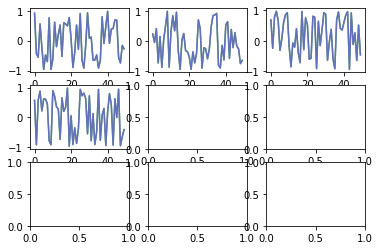

In [13]:
train_policy(
    trainer=continue_trainer,
    learn_fct=continue_trainer.learn_fct,
    val_env=model.env,
    logname='Continue SAC',
    path='/home/hendrik/Documents/master_project/LokalData/ImitationLearning/',
    n_epochs=1,
    n_steps=50,
    eval_epochs=1,
    step_fct=lambda i: i+1
)

In [53]:
global NUM_RESETS

In [27]:
sd = torch.load('/home/hendrik/Documents/master_project/LokalData/ImitationLearning/BC Trainer Large Model/last_model')

In [28]:
continue_trainer.policy.load_state_dict(sd)

<All keys matched successfully>

log dir: /home/hendrik/Documents/master_project/LokalData/ImitationLearning/load_plicy/gboard/best val policy SAC/train/
torch.Size([1, 50, 4])


-100

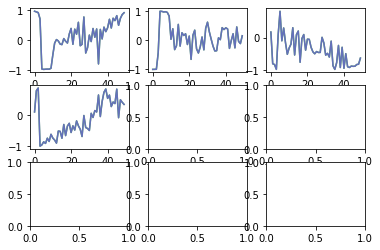

In [22]:
benchmark_policy(policy=continue_trainer.policy, path='/home/hendrik/Documents/master_project/LokalData/ImitationLearning/load_plicy/', logname='best val policy SAC', eval_epochs=500, val_env=model.env, stepid=1, best_reward=-100, save_model=False)

In [13]:
torch.save(continue_trainer.policy.state_dict(), '/home/hendrik/Documents/master_project/LokalData/ImitationLearning/BC Trainer Large Model/last_model')